In [1]:
from scipy.io import arff
import pandas as pd
from imblearn.metrics import geometric_mean_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, svm, neighbors
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import f1_score

data = arff.loadarff('vehicle.arff')
df_vehicle = pd.DataFrame(data[0])

# Drop the last column
df_vehicle_clust = df_vehicle.iloc[:, :-2]

data = arff.loadarff('vowel.arff')
df_vowel = pd.DataFrame(data[0])

# Drop the last column
df_vowel_clust = df_vowel.iloc[:, :-2]

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

# Drop the last column
df_iris_clust = df_iris.iloc[:, :-2]

data = arff.loadarff('diabetes.arff')
df_diabe = pd.DataFrame(data[0])

# Drop the last column
df_diabe_clust = df_diabe.iloc[:, :-2]

data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

# Drop the last column
df_iono_clust = df_iono.iloc[:, :-2]

In [ ]:
# Seleccione el algoritmo de clustering k-means.

from sklearn.cluster import KMeans

In [ ]:
# Selecciones los algoritmos de clustering jerárquicos single link, complete link y average link.

from sklearn.cluster import AgglomerativeClustering

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Assume that X is the data
X = df_iris_clust.values

# Create a KMeans model with 5 clusters
model = KMeans(n_clusters=5)

# Fit the model to the data
model.fit(X)

# Transform the data into the cluster space
distances_matrix = model.transform(X)

print(distances_matrix)
print(distances_matrix.shape)

[[4.33922676 0.14019986 3.54472744 5.45813613 2.69564983]
 [4.38925456 0.43595413 3.55130388 5.53680865 2.61146089]
 [4.56240677 0.40994634 3.73208064 5.71893784 2.79544773]
 [4.42266888 0.51696808 3.58276481 5.59519883 2.62162698]
 [4.38558244 0.19301813 3.59530301 5.51010435 2.74738567]
 [4.02547444 0.66577474 3.28846187 5.10551173 2.5645522 ]
 [4.52523787 0.41140734 3.70638838 5.68781593 2.78469532]
 [4.27252202 0.04069398 3.46515726 5.40751791 2.58776506]
 [4.60591407 0.79978497 3.7528631  5.78932207 2.75821101]
 [4.29689811 0.33712906 3.46403479 5.44713227 2.53340246]
 [4.17718672 0.48585595 3.4173712  5.26082218 2.64955242]
 [4.25962961 0.24749949 3.4453807  5.41490997 2.54325146]
 [4.42844342 0.47037857 3.58756856 5.58401737 2.63653712]
 [4.91550834 0.89758342 4.06797565 6.09395192 3.08287658]
 [4.42794158 1.01924286 3.72463023 5.43886477 3.06243824]
 [4.26900977 1.20301953 3.60795161 5.2741113  3.01252851]
 [4.40100999 0.64378257 3.65947527 5.46866071 2.91604664]
 [4.33922676 0

In [14]:
distances_matrix = pairwise_distances(incidence_matrix)
print(distances_matrix)

[[0.         0.         0.         ... 8.77496439 8.77496439 9.2736185 ]
 [0.         0.         0.         ... 8.77496439 8.77496439 9.2736185 ]
 [0.         0.         0.         ... 8.77496439 8.77496439 9.2736185 ]
 ...
 [8.77496439 8.77496439 8.77496439 ... 0.         0.         7.93725393]
 [8.77496439 8.77496439 8.77496439 ... 0.         0.         7.93725393]
 [9.2736185  9.2736185  9.2736185  ... 7.93725393 7.93725393 0.        ]]


In [11]:
import numpy as np
from sklearn.cluster import KMeans

# Assume that X is the data

# Create a KMeans model with 5 clusters
model = KMeans(n_clusters=5)

# Fit the model to the data
model.fit(X)

# Obtain the cluster labels for each data point
cluster_labels = model.labels_

# Initialize an empty matrix with the same number of rows and columns as the number of data points
incidence_matrix = np.empty((X.shape[0], X.shape[0]))

# Iterate over all pairs of data points
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        # If the data points belong to the same cluster, fill in the matrix with 1
        if cluster_labels[i] == cluster_labels[j]:
            incidence_matrix[i, j] = 1
        # If the data points belong to different clusters, fill in the matrix with 0
        else:
            incidence_matrix[i, j] = 0

print(incidence_matrix)
print(incidence_matrix.shape)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(150, 150)


In [16]:
import numpy as np
from scipy.spatial.distance import cdist

# Assume that X is the data

# Compute the Euclidean distance matrix
distance_matrix = cdist(X, X, metric='euclidean')

# Initialize an empty matrix with the same number of rows and columns as the number of data points
proximity_matrix = np.empty((X.shape[0], X.shape[0]))

# Iterate over all pairs of data points
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        # Fill in the matrix with the distance between the corresponding pairs of data points
        proximity_matrix[i, j] = distance_matrix[i, j]

print(proximity_matrix)
print(proximity_matrix.shape)

[[0.         0.53851648 0.50990195 ... 4.08044115 4.14969878 3.81837662]
 [0.53851648 0.         0.3        ... 4.12310563 4.22492603 3.83275358]
 [0.50990195 0.3        0.         ... 4.3        4.37035468 3.98998747]
 ...
 [4.08044115 4.12310563 4.3        ... 0.         0.53851648 0.60827625]
 [4.14969878 4.22492603 4.37035468 ... 0.53851648 0.         0.58309519]
 [3.81837662 3.83275358 3.98998747 ... 0.60827625 0.58309519 0.        ]]
(150, 150)


In [22]:
import numpy as np

corr_matrix = np.corrcoef(proximity_matrix, incidence_matrix)
print(corr_matrix)

[[ 1.          0.99145707  0.9925972  ...  0.44804663  0.44804663
   0.28309357]
 [ 0.99145707  1.          0.99877938 ...  0.45670455  0.45670455
   0.27600795]
 [ 0.9925972   0.99877938  1.         ...  0.45184886  0.45184886
   0.28409084]
 ...
 [ 0.44804663  0.45670455  0.45184886 ...  1.          1.
  -0.26328623]
 [ 0.44804663  0.45670455  0.45184886 ...  1.          1.
  -0.26328623]
 [ 0.28309357  0.27600795  0.28409084 ... -0.26328623 -0.26328623
   1.        ]]


In [68]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# Assume that the incidence matrix is stored in a NumPy array called "incidence_matrix"
# and that the proximity matrix is stored in a NumPy array called "proximity_matrix"

n_clusters = 30

# Use the proximity matrix to create a clustering of the data using Agglomerative Clustering
clustering = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=n_clusters)
clustering.fit(proximity_matrix)

# Use the incidence matrix to create a reference clustering of the data
reference_clustering = AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=n_clusters)
reference_clustering.fit(incidence_matrix)

# Calculate the adjusted Rand index between the two clusterings
ari = adjusted_rand_score(clustering.labels_, reference_clustering.labels_)

print(ari)

-0.015701414234118426


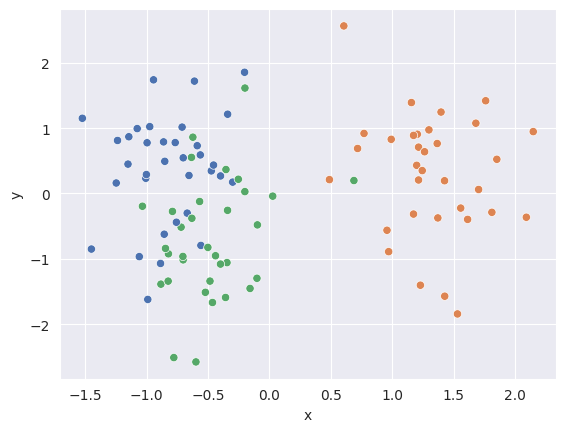

In [91]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

centers = 3
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=10000)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [92]:
import fastcluster as fc
import numpy as np
from scipy.cluster.hierarchy import cophenet

X = X_train  # Original data (1000 observations)
Z = fc.linkage_vector(X)         # Clustering

orign_dists = fc.pdist(X)  # Matrix of original distances between observations
cophe_dists = cophenet(Z)  # Matrix of cophenetic distances between observations

# What I really want at the end of the day is
corr_coef = np.corrcoef(orign_dists, cophe_dists)[0,1]
print(corr_coef)

0.6804423164613378


In [ ]:
from sklearn.metrics import silhouette_score

